In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
surveys_df = pd.read_csv('surveys.csv')

In [4]:
surveys_df.columns

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

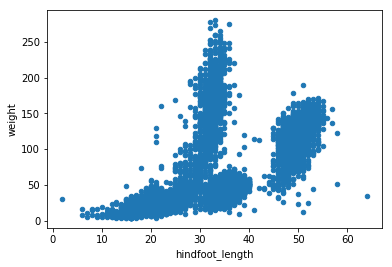

In [7]:
surveys_df.plot('hindfoot_length', 'weight', kind='scatter')

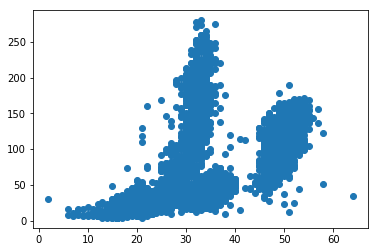

In [8]:
plt.scatter(surveys_df['hindfoot_length'], surveys_df['weight'])

Text(0, 0.5, 'weight')

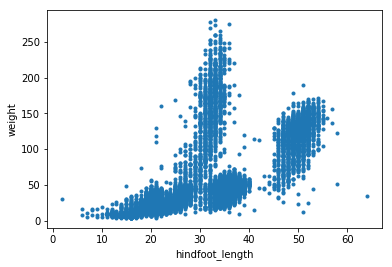

In [12]:
plt.scatter(surveys_df['hindfoot_length'], surveys_df['weight'], marker='.')
plt.xlabel('hindfoot_length')
plt.ylabel('weight')

In [10]:
# Excercise: make the same scatter plot using plt.scatter, but with smaller marker size
# Hint: look at the documentation of plt.scatter
plt.scatter?

Signature:
plt.scatter(
    x,
    y,
    s=None,
    c=None,
    marker=None,
    cmap=None,
    norm=None,
    vmin=None,
    vmax=None,
    alpha=None,
    linewidths=None,
    verts=None,
    edgecolors=None,
    *,
    data=None,
    **kwargs,
)
Docstring:
A scatter plot of *y* vs *x* with varying marker size and/or color.

Parameters
----------
x, y : array_like, shape (n, )
    The data positions.

s : scalar or array_like, shape (n, ), optional
    The marker size in points**2.
    Default is ``rcParams['lines.markersize'] ** 2``.

c : color, sequence, or sequence of color, optional
    The marker color. Possible values:

    - A single color format string.
    - A sequence of color specifications of length n.
    - A sequence of n numbers to be mapped to colors using *cmap* and
      *norm*.
    - A 2-D array in which the rows are RGB or RGBA.

    Note that *c* should not be a single numeric RGB or RGBA sequence
    because that is indistinguishable from an array of values to

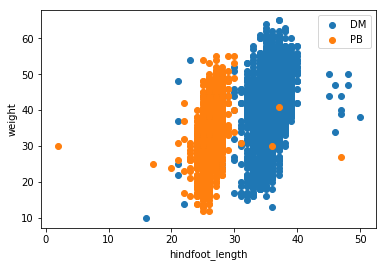

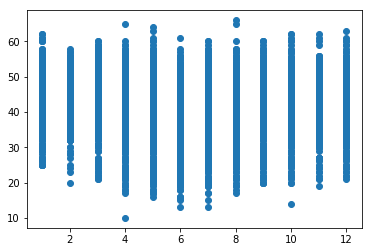

In [19]:
dm_df = surveys_df[surveys_df['species_id']=='DM']
pb_df = surveys_df[surveys_df['species_id']=='PB']

plt.scatter(dm_df['hindfoot_length'], dm_df['weight'], label='DM')
plt.scatter(pb_df['hindfoot_length'], pb_df['weight'], label='PB')
plt.xlabel('hindfoot_length')
plt.ylabel('weight')
plt.legend()
plt.show()

plt.scatter(dm_df['month'], dm_df['weight'])

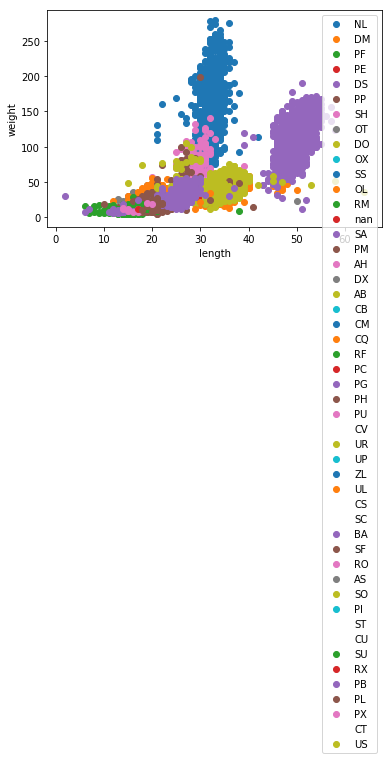

In [24]:
species_ids = surveys_df['species_id'].unique()
for species in species_ids:
    subset_df = surveys_df[surveys_df['species_id']==species]
    plt.scatter(subset_df['hindfoot_length'], subset_df['weight'], label=species)

plt.xlabel('length')
plt.ylabel('weight')
legend = plt.legend()

In [34]:
count_per_year = surveys_df['year'].value_counts(sort=False)

In [40]:
count_per_year = count_per_year.sort_index()

In [42]:
count_per_year

1977     503
1978    1048
1979     719
1980    1415
1981    1472
1982    1978
1983    1673
1984     981
1985    1438
1986     942
1987    1671
1988    1469
1989    1569
1990    1311
1991    1347
1992    1038
1993     750
1994     668
1995    1222
1996    1706
1997    2493
1998    1610
1999    1135
2000    1552
2001    1610
2002    2229
Name: year, dtype: int64

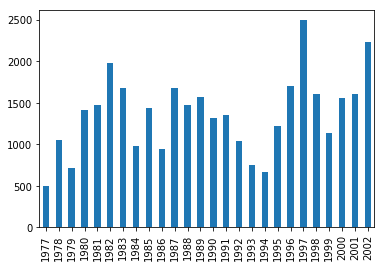

In [41]:
count_per_year.plot(kind='bar')

In [ ]:
# Exercise: make a plot of the number of observations per year, but now a line plot

# Extra challenge: make one plot with two lines: one is the number of females observed per year, 
# and one is the number of males observed per year

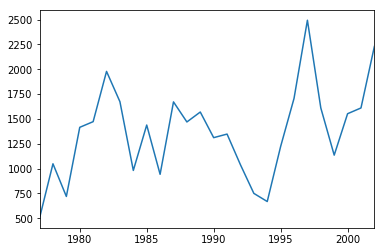

In [44]:
count_per_year.plot(kind='line')

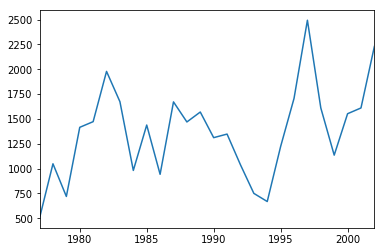

In [48]:
count_per_year = surveys_df['year'].value_counts(sort=False)
count_per_year = count_per_year.sort_index()
count_per_year.plot(kind='line')

In [53]:
count_per_year.loc[1995:2000]

1995    1222
1996    1706
1997    2493
1998    1610
1999    1135
2000    1552
Name: year, dtype: int64

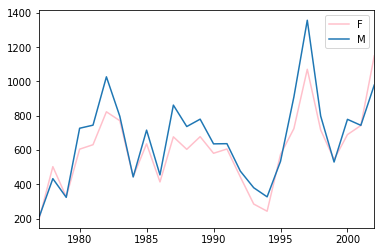

In [56]:
female_df = surveys_df[surveys_df['sex']=='F']
male_df = surveys_df[surveys_df['sex']=='M']

female_counts = female_df['year'].value_counts(sort=False).sort_index()
male_counts = male_df['year'].value_counts(sort=False).sort_index()

female_counts.plot(label='F', c='pink')
male_counts.plot(label='M')
plt.legend()

In [57]:
from scipy import stats

In [58]:
import numpy as np

In [59]:
dm_df = surveys_df[surveys_df['species_id']=='DM']
dm_df.shape

(10596, 9)

In [60]:
dm_df = dm_df.dropna()

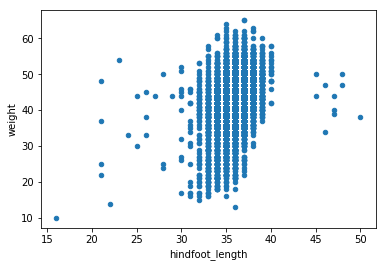

In [61]:
dm_df.plot('hindfoot_length', 'weight', kind='scatter')

In [62]:
weights = dm_df['weight'].values 

In [63]:
type(weights)

numpy.ndarray

In [64]:
weights

array([40., 48., 29., ..., 53., 42., 46.])

In [66]:
lengths = dm_df['hindfoot_length'].values

In [69]:
output_r, output_p = stats.pearsonr(weights, lengths)

In [70]:
print(output_r, output_p)

0.3573719074264195 6.4095043497782746e-291


In [ ]:
# Exercise: have a look at the documentation of stats.linregress. 
# Use this to fit a linear regression with weight as input / independent variable, 
# and hindfoot_length as output / dependent variable. What are the slope and intercept?

In [73]:
stats.linregress(weights, lengths)

LinregressResult(slope=0.07638649938825319, intercept=32.6955327480908, rvalue=0.3573719074264192, pvalue=6.409504349804317e-291, stderr=0.0020243270314801356)

In [75]:
stats.linregress?

Signature: stats.linregress(x, y=None)
Docstring:
Calculate a linear least-squares regression for two sets of measurements.

Parameters
----------
x, y : array_like
    Two sets of measurements.  Both arrays should have the same length.
    If only x is given (and y=None), then it must be a two-dimensional
    array where one dimension has length 2.  The two sets of measurements
    are then found by splitting the array along the length-2 dimension.

Returns
-------
slope : float
    slope of the regression line
intercept : float
    intercept of the regression line
rvalue : float
    correlation coefficient
pvalue : float
    two-sided p-value for a hypothesis test whose null hypothesis is
    that the slope is zero, using Wald Test with t-distribution of
    the test statistic.
stderr : float
    Standard error of the estimated gradient.

See also
--------
:func:`scipy.optimize.curve_fit` : Use non-linear
 least squares to fit a function to data.
:func:`scipy.optimize.leastsq` : Mini